In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import yaml

# Windage 3

In [2]:
m = '/home/soontiensn/data/gpsc-work2/OPP/mldp-opendrift-comparison/DriftMap/new/mldp-winds3.0/output/ciops-e_ml_2022022400_P2D.nc'
o = '/home/soontiensn/data/gpsc-work2/OPP/mldp-opendrift-comparison/DriftMap/new/opendrift-winds3.0//output/ciops-e_od_2022022400_P2D.nc'

In [3]:
dm = xr.open_dataset(m)
do = xr.open_dataset(o)

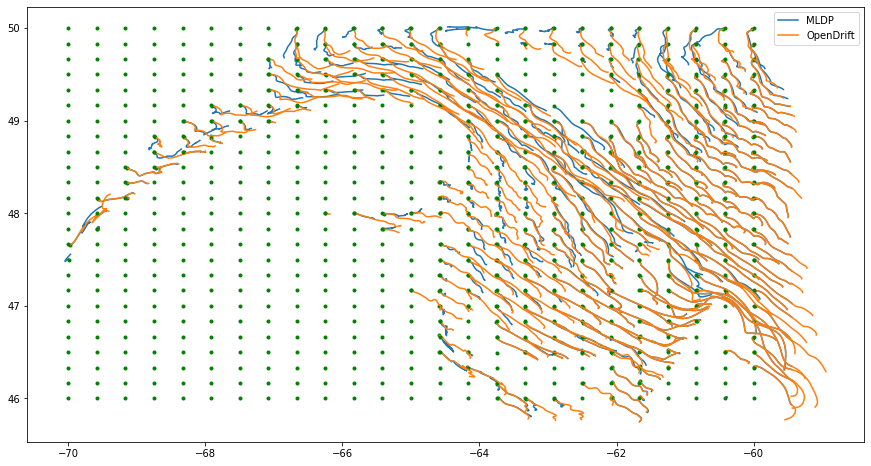

In [4]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
for d, color, l in zip([dm, do], ['C0', 'C1'], ['MLDP', 'OpenDrift']):
    count=0
    for m in d.model_run.values:
        dsel = d.sel(model_run=m)
        label=l if count==0 else '__no-label__'
        ax.plot(dsel.mod_lon, dsel.mod_lat, '-', color=color,label=label)
        ax.plot(dsel.mod_lon[0], dsel.mod_lat[0], '.g',label='__nolabel')
        count+=1
ax.legend()

In [5]:
dm

<xarray.Dataset>
Dimensions:     (model_run: 625, time: 47)
Coordinates:
  * time        (time) datetime64[ns] 2022-02-24T01:00:00 ... 2022-02-25T23:0...
Dimensions without coordinates: model_run
Data variables:
    mod_lat     (model_run, time) float64 ...
    mod_lon     (model_run, time) float64 ...
    buoyid      (model_run) object ...
    mod_dist    (model_run, time) float64 ...
    mod_disp    (model_run, time) float64 ...
    track_dist  (model_run, time) float64 ...
    ratio       (model_run, time) float64 ...
Attributes:
    mod_run_name:    ciops-e_ml_2022022400_P2D
    mod_drifter_id:  CIOPS-E_2022-02-24_0
    mod_nb_output:   48.0
    mod_windage:     3.0

In [6]:
do

<xarray.Dataset>
Dimensions:     (model_run: 306, time: 49)
Coordinates:
  * time        (time) datetime64[ns] 2022-02-24 ... 2022-02-26
Dimensions without coordinates: model_run
Data variables:
    mod_lat     (model_run, time) float32 ...
    mod_lon     (model_run, time) float32 ...
    buoyid      (model_run) int64 ...
    mod_dist    (model_run, time) float64 ...
    mod_disp    (model_run, time) float64 ...
    track_dist  (model_run, time) float64 ...
    ratio       (model_run, time) float64 ...
Attributes: (12/122)
    mod_run_name:                                                            ...
    mod_atmos_model:                                                         ...
    mod_drifter_depth:                                                       ...
    mod_alpha_wind:                                                          ...
    mod_nb_output:                                                           ...
    mod_ocean_model:                                                         ...
    ...                                                                                                                   ...
    mod_geospatial_lat_resolution:                                           ...
    mod_geospatial_lon_min:                                                  ...
    mod_geospatial_lon_max:                                                  ...
    mod_geospatial_lon_units:                                                ...
    mod_geospatial_lon_resolution:                                           ...
    mod_runtime:                                                             ...

In [7]:
do.mod_alpha_wind

3.0

In [8]:
do.mod_reader_x_wind

'["[\'/home/nso001/data/work2/OPP/mldp-opendrift-comparison/DriftMap/new/opendrift-winds3.0/runs/ciops-e_od_2022022400_P2D/data/atmos/ywindvel_xwindvel_00001.nc\', \'/home/nso001/data/work2/OPP/mldp-opendrift-comparison/DriftMap/new/opendrift-winds3.0/runs/ciops-e_od_2022022400_P2D/data/atmos/ywindvel_xwindvel_00002.nc\', \'/home/nso001/data/work2/OPP/mldp-opendrift-comparison/DriftMap/new/opendrift-winds3.0/runs/ciops-e_od_2022022400_P2D/data/atmos/ywindvel_xwindvel_00003.nc\', \'/home/nso001/data/work2/OPP/mldp-opendrift-comparison/DriftMap/new/opendrift-winds3.0/runs/ciops-e_od_2022022400_P2D/data/atmos/ywindvel_xwindvel_00004.nc\', \'/home/nso001/data/work2/OPP/mldp-opendrift-comparison/DriftMap/new/opendrift-winds3.0/runs/ciops-e_od_2022022400_P2D/data/atmos/ywindvel_xwindvel_00005.nc\', \'/home/nso001/data/work2/OPP/mldp-opendrift-comparison/DriftMap/new/opendrift-winds3.0/runs/ciops-e_od_2022022400_P2D/data/atmos/ywindvel_xwindvel_00006.nc\', \'/home/nso001/data/work2/OPP/mldp-o

In [9]:
import seawater as sw
import numpy as np

In [10]:
# Distance at last output time
dmsel = dm.isel(time=-1)
dosel = do.isel(time=-1)
doinit = do.isel(time=0)
dist = np.zeros(len(dmsel.mod_lon.values))
count=0
for p in range(dist.shape[0]):
    lat0=dm.isel(time=0).mod_lat.values[p]
    lon0=dm.isel(time=0).mod_lon.values[p]
    indlats = np.where(np.abs(doinit.mod_lat.values-lat0) < 1e-5)[0]
    indlons = np.where(np.abs(doinit.mod_lon.values-lon0) < 1e-5)[0]
    if not indlons.size == 0 and not indlats.size == 0:
        print(indlons, indlats)
        print(set(indlats).intersection(indlons))
        count+=1
    #lat = np.array([dmsel.mod_lat.values[p], dosel.mod_lat.values[p]])
    #lon = np.array([dmsel.mod_lon.values[p], dosel.mod_lon.values[p]])
    #dist[p] = sw.dist(lat,lon)[0] # distance defualts in km

[91] [0 1 2 3 4]
set()
[104 117 134] [0 1 2 3 4]
set()
[119 233 247 262 276 291] [0 1 2 3 4]
set()
[91] [24 25 26 27 28 29 30 31 32]
set()
[104 117 134] [24 25 26 27 28 29 30 31 32]
set()
[135 148 161] [24 25 26 27 28 29 30 31 32]
set()
[162 174 187] [24 25 26 27 28 29 30 31 32]
set()
[175 188 201] [24 25 26 27 28 29 30 31 32]
set()
[189 202 216] [24 25 26 27 28 29 30 31 32]
set()
[203 217] [24 25 26 27 28 29 30 31 32]
set()
[204 218 230 244 259] [24 25 26 27 28 29 30 31 32]
set()
[219 231 245 260 274 289] [24 25 26 27 28 29 30 31 32]
set()
[118 232 246 261 275 290] [24 25 26 27 28 29 30 31 32]
set()
[105 120 234 248 263 277 292] [0 1 2 3 4]
set()
[119 233 247 262 276 291] [24 25 26 27 28 29 30 31 32]
set()
[105 120 234 248 263 277 292] [24 25 26 27 28 29 30 31 32]
set()
[ 54 121 235 249 264 278 293] [24 25 26 27 28 29 30 31 32]
set()
[  9  15  44  56  68  80  93 106 123 137 150 163 176 190 205 221 237 251
 266 295] [24 25 26 27 28 29 30 31 32]
set()
[ 54 121 235 249 264 278 293] [0 1 

[189 202 216] [0 1 2 3 4]
set()
[91] [ 9 10 11 12 13]
set()
[91] [230 231 232 233 234 235 236 237 238 239 240 241 242 243]
set()
[104 117 134] [230 231 232 233 234 235 236 237 238 239 240 241 242 243]
set()
[135 148 161] [230 231 232 233 234 235 236 237 238 239 240 241 242 243]
set()
[162 174 187] [230 231 232 233 234 235 236 237 238 239 240 241 242 243]
set()
[175 188 201] [230 231 232 233 234 235 236 237 238 239 240 241 242 243]
set()
[189 202 216] [230 231 232 233 234 235 236 237 238 239 240 241 242 243]
set()
[203 217] [230 231 232 233 234 235 236 237 238 239 240 241 242 243]
set()
[104 117 134] [ 9 10 11 12 13]
set()
[  6  18  28  37  48  60  72  84  97 110 127 141 154 167 180 194 209 267
 282 299] [230 231 232 233 234 235 236 237 238 239 240 241 242 243]
set()
[135 148 161] [ 9 10 11 12 13]
set()
[91] [244 245 246 247 248 249 250 251 252 253 254 255 256 257 258]
set()
[104 117 134] [244 245 246 247 248 249 250 251 252 253 254 255 256 257 258]
set()
[135 148 161] [244 245 246 247 

In [11]:
count

292

In [12]:
doinit.mod_lon.values

array([-63.75    , -63.333332, -62.916668, -62.083332, -61.666668,
       -63.75    , -62.5     , -62.083332, -61.666668, -64.166664,
       -62.083332, -61.666668, -61.25    , -60.      , -64.583336,
       -64.166664, -63.333332, -62.916668, -62.5     , -62.083332,
       -61.666668, -61.25    , -60.416668, -60.      , -64.583336,
       -63.75    , -63.333332, -62.916668, -62.5     , -62.083332,
       -61.666668, -61.25    , -60.      , -64.583336, -63.75    ,
       -63.333332, -62.916668, -62.5     , -62.083332, -61.666668,
       -61.25    , -60.833332, -60.      , -64.583336, -64.166664,
       -63.75    , -63.333332, -62.916668, -62.5     , -62.083332,
       -61.666668, -61.25    , -60.833332, -60.      , -65.      ,
       -64.583336, -64.166664, -63.75    , -63.333332, -62.916668,
       -62.5     , -62.083332, -61.666668, -61.25    , -60.833332,
       -60.416668, -60.      , -64.583336, -64.166664, -63.75    ,
       -63.333332, -62.916668, -62.5     , -62.083332, -61.666

In [13]:
doinit.mod_lat.values

array([46.      , 46.      , 46.      , 46.      , 46.      , 46.166668,
       46.166668, 46.166668, 46.166668, 46.333332, 46.333332, 46.333332,
       46.333332, 46.333332, 46.5     , 46.5     , 46.5     , 46.5     ,
       46.5     , 46.5     , 46.5     , 46.5     , 46.5     , 46.5     ,
       46.666668, 46.666668, 46.666668, 46.666668, 46.666668, 46.666668,
       46.666668, 46.666668, 46.666668, 46.833332, 46.833332, 46.833332,
       46.833332, 46.833332, 46.833332, 46.833332, 46.833332, 46.833332,
       46.833332, 47.      , 47.      , 47.      , 47.      , 47.      ,
       47.      , 47.      , 47.      , 47.      , 47.      , 47.      ,
       47.166668, 47.166668, 47.166668, 47.166668, 47.166668, 47.166668,
       47.166668, 47.166668, 47.166668, 47.166668, 47.166668, 47.166668,
       47.166668, 47.333332, 47.333332, 47.333332, 47.333332, 47.333332,
       47.333332, 47.333332, 47.333332, 47.333332, 47.333332, 47.333332,
       47.333332, 47.5     , 47.5     , 47.5     , 

In [14]:
dm.isel(time=0).mod_lon.values

array([-70.        , -69.58334351, -65.83334351, -70.        ,
       -69.58334351, -69.16665649, -68.75      , -68.33334351,
       -67.91665649, -67.5       , -67.08334351, -66.66665649,
       -66.25      , -65.41665649, -65.83334351, -65.41665649,
       -65.        , -64.58551025, -64.16665649, -63.7477417 ,
       -63.3302002 , -62.91357422, -62.49490356, -62.074646  ,
       -65.        , -61.65911865, -61.25234985, -60.83334351,
       -60.41665649, -60.00823975, -70.        , -69.58334351,
       -69.16665649, -68.75      , -68.33334351, -64.58334351,
       -67.91665649, -67.5       , -67.08334351, -66.66665649,
       -66.25      , -65.83334351, -65.41665649, -65.        ,
       -64.58236694, -64.16665649, -64.16665649, -63.7520752 ,
       -63.33135986, -62.9140625 , -62.49432373, -62.07980347,
       -61.66275024, -61.23510742, -60.83050537, -60.41665649,
       -59.99768066, -63.73080444, -70.        , -69.58334351,
       -69.16665649, -68.75      , -68.33334351, -67.91

In [15]:
dm.isel(time=0).mod_lat.values

array([46.        , 46.        , 46.        , 46.66666794, 46.66666794,
       46.66666794, 46.66666794, 46.66666794, 46.66666794, 46.66666794,
       46.66666794, 46.66666794, 46.66666794, 46.        , 46.66666794,
       46.66666794, 46.66666794, 46.67960358, 46.66666794, 46.66137314,
       46.65606308, 46.65427017, 46.65261459, 46.65764999, 46.        ,
       46.66871262, 46.68169022, 46.66666794, 46.66666794, 46.65716171,
       46.83333206, 46.83333206, 46.83333206, 46.83333206, 46.83333206,
       46.        , 46.83333206, 46.83333206, 46.83333206, 46.83333206,
       46.83333206, 46.83333206, 46.83333206, 46.83333206, 46.83734894,
       46.83333206, 46.        , 46.82372284, 46.82232666, 46.8219223 ,
       46.81978226, 46.82518387, 46.83390045, 46.83480072, 46.83494568,
       46.83333206, 46.8310051 , 45.99995041, 47.        , 47.        ,
       47.        , 47.        , 47.        , 47.        , 47.        ,
       47.        , 47.        , 47.        , 45.99537277, 47.  

In [16]:
dm.time

<xarray.DataArray 'time' (time: 47)>
array(['2022-02-24T01:00:00.000000000', '2022-02-24T02:00:00.000000000',
       '2022-02-24T03:00:00.000000000', '2022-02-24T04:00:00.000000000',
       '2022-02-24T05:00:00.000000000', '2022-02-24T06:00:00.000000000',
       '2022-02-24T07:00:00.000000000', '2022-02-24T08:00:00.000000000',
       '2022-02-24T09:00:00.000000000', '2022-02-24T10:00:00.000000000',
       '2022-02-24T11:00:00.000000000', '2022-02-24T12:00:00.000000000',
       '2022-02-24T13:00:00.000000000', '2022-02-24T14:00:00.000000000',
       '2022-02-24T15:00:00.000000000', '2022-02-24T16:00:00.000000000',
       '2022-02-24T17:00:00.000000000', '2022-02-24T18:00:00.000000000',
       '2022-02-24T19:00:00.000000000', '2022-02-24T20:00:00.000000000',
       '2022-02-24T21:00:00.000000000', '2022-02-24T22:00:00.000000000',
       '2022-02-24T23:00:00.000000000', '2022-02-25T00:00:00.000000000',
       '2022-02-25T01:00:00.000000000', '2022-02-25T02:00:00.000000000',
       '2022-02-25T03:00:00.000000000', '2022-02-25T04:00:00.000000000',
       '2022-02-25T05:00:00.000000000', '2022-02-25T06:00:00.000000000',
       '2022-02-25T07:00:00.000000000', '2022-02-25T08:00:00.000000000',
       '2022-02-25T09:00:00.000000000', '2022-02-25T10:00:00.000000000',
       '2022-02-25T11:00:00.000000000', '2022-02-25T12:00:00.000000000',
       '2022-02-25T13:00:00.000000000', '2022-02-25T14:00:00.000000000',
       '2022-02-25T15:00:00.000000000', '2022-02-25T16:00:00.000000000',
       '2022-02-25T17:00:00.000000000', '2022-02-25T18:00:00.000000000',
       '2022-02-25T19:00:00.000000000', '2022-02-25T20:00:00.000000000',
       '2022-02-25T21:00:00.000000000', '2022-02-25T22:00:00.000000000',
       '2022-02-25T23:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-02-24T01:00:00 ... 2022-02-25T23:00:00

In [17]:
do.time

<xarray.DataArray 'time' (time: 49)>
array(['2022-02-24T00:00:00.000000000', '2022-02-24T01:00:00.000000000',
       '2022-02-24T02:00:00.000000000', '2022-02-24T03:00:00.000000000',
       '2022-02-24T04:00:00.000000000', '2022-02-24T05:00:00.000000000',
       '2022-02-24T06:00:00.000000000', '2022-02-24T07:00:00.000000000',
       '2022-02-24T08:00:00.000000000', '2022-02-24T09:00:00.000000000',
       '2022-02-24T10:00:00.000000000', '2022-02-24T11:00:00.000000000',
       '2022-02-24T12:00:00.000000000', '2022-02-24T13:00:00.000000000',
       '2022-02-24T14:00:00.000000000', '2022-02-24T15:00:00.000000000',
       '2022-02-24T16:00:00.000000000', '2022-02-24T17:00:00.000000000',
       '2022-02-24T18:00:00.000000000', '2022-02-24T19:00:00.000000000',
       '2022-02-24T20:00:00.000000000', '2022-02-24T21:00:00.000000000',
       '2022-02-24T22:00:00.000000000', '2022-02-24T23:00:00.000000000',
       '2022-02-25T00:00:00.000000000', '2022-02-25T01:00:00.000000000',
       '2022-02-25T02:00:00.000000000', '2022-02-25T03:00:00.000000000',
       '2022-02-25T04:00:00.000000000', '2022-02-25T05:00:00.000000000',
       '2022-02-25T06:00:00.000000000', '2022-02-25T07:00:00.000000000',
       '2022-02-25T08:00:00.000000000', '2022-02-25T09:00:00.000000000',
       '2022-02-25T10:00:00.000000000', '2022-02-25T11:00:00.000000000',
       '2022-02-25T12:00:00.000000000', '2022-02-25T13:00:00.000000000',
       '2022-02-25T14:00:00.000000000', '2022-02-25T15:00:00.000000000',
       '2022-02-25T16:00:00.000000000', '2022-02-25T17:00:00.000000000',
       '2022-02-25T18:00:00.000000000', '2022-02-25T19:00:00.000000000',
       '2022-02-25T20:00:00.000000000', '2022-02-25T21:00:00.000000000',
       '2022-02-25T22:00:00.000000000', '2022-02-25T23:00:00.000000000',
       '2022-02-26T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-02-24 2022-02-24T01:00:00 ... 2022-02-26

I can't find the matching drifters because we aren't recording the initial position in mldp!!

I can look up the initial positions in the drifter_positions.yaml file and then append to the arrays. 

In [18]:
lons_mldp = dm.mod_lon.values
lats_mldp = dm.mod_lat.values

In [19]:
positions_file='/home/soontiensn/data/gpsc-work2/OPP/mldp-opendrift-comparison/DriftMap/new/mldp-winds3.0/runs/ciops-e_ml_2022022400_P2D/drifter_positions.yaml'
with open(positions_file, 'r') as f:
    drifter_positions = yaml.load(f, Loader=yaml.FullLoader)
drifter_positions=drifter_positions['drifter_grid_positions']

In [20]:
new_lons_mldp = np.zeros((lons_mldp.shape[0], lons_mldp.shape[1]+1))
new_lats_mldp = np.zeros((lats_mldp.shape[0], lats_mldp.shape[1]+1))
for n in range(lons_mldp.shape[0]):
    lon,lat = drifter_positions[n]
    new_lons_mldp[n,:] = np.insert(lons_mldp[n,:], 0, lon)
    new_lats_mldp[n,:] = np.insert(lats_mldp[n,:], 0, lat)

In [21]:
# Distance at last output time
dosel = do.isel(time=-2)
doinit = do.isel(time=0)
dist =[]
init_lons=[]
init_lats=[]
count=0
for p in range(new_lons_mldp.shape[0]):
    lat0=new_lats_mldp[p,0]
    lon0=new_lons_mldp[p,0]
    indlats = np.where(np.abs(doinit.mod_lat.values-lat0) < 1e-6)[0]
    indlons = np.where(np.abs(doinit.mod_lon.values-lon0) < 1e-6)[0]
    if not indlons.size == 0 and not indlats.size == 0:
        s = set(indlats).intersection(indlons)
        if s:
            count+=1
            ind=next(iter(s))
            lat = np.array([new_lats_mldp[p,-1], dosel.mod_lat.values[ind]])
            lon = np.array([new_lons_mldp[p,-1], dosel.mod_lon.values[ind]])
            print(lat0,lon0)
            print(lat,lon)
            init_lons.append(lon0)
            init_lats.append(lat0)
            dist.append(sw.dist(lat,lon)[0][0]) # distance defualts in km

46.0 -63.75
[        nan 45.77887344] [         nan -63.29103088]
46.0 -63.333333333333336
[        nan 45.76414108] [        nan -62.8907547]
46.0 -62.916666666666664
[46.52975845 45.77774429] [-64.41375732 -62.51897049]
46.0 -62.083333333333336
[       nan 45.7492981] [         nan -61.66098022]
46.0 -61.666666666666664
[        nan 45.99356842] [         nan -61.60297775]
46.166666666666664 -63.75
[        nan 45.85546875] [         nan -63.33043671]
46.166666666666664 -62.5
[        nan 45.92915726] [         nan -62.06088638]
46.166666666666664 -62.083333333333336
[46.72696686 45.85606766] [-64.48962402 -61.55910873]
46.166666666666664 -61.666666666666664
[        nan 46.08824921] [         nan -61.47225571]
46.333333333333336 -64.16666666666667
[        nan 46.04174423] [         nan -63.63527298]
46.333333333333336 -62.083333333333336
[        nan 46.04369736] [         nan -61.55495453]
46.333333333333336 -61.666666666666664
[        nan 46.20958328] [         nan -61.36369705]

[49.57410812 48.82216644] [-62.05062866 -60.29529572]
49.333333333333336 -60.416666666666664
[        nan 48.96356583] [         nan -59.88043213]
49.333333333333336 -60.0
[49.46029663 49.05114365] [-61.65063477 -59.41094208]
49.5 -67.08333333333333
[       nan 49.3951683] [         nan -66.06907654]
49.5 -66.66666666666667
[        nan 49.43032837] [         nan -65.68487549]
49.5 -66.25
[        nan 49.33193588] [         nan -65.22265625]
49.5 -65.83333333333333
[        nan 49.23602676] [         nan -64.82421875]
49.5 -65.41666666666667
[        nan 49.07413101] [         nan -64.31539154]
49.5 -65.0
[49.82521439 49.00881577] [-67.05554199 -63.91263962]
49.5 -64.58333333333333
[49.5958252  48.99485016] [-66.59680176 -63.59889221]
49.5 -64.16666666666667
[49.71403503 49.04143524] [-66.12637329 -63.33550262]
49.5 -63.75
[49.79436111 49.05255508] [-65.57049561 -62.97350693]
49.5 -62.083333333333336
[        nan 49.18458557] [         nan -61.51859283]
49.5 -61.666666666666664
[      

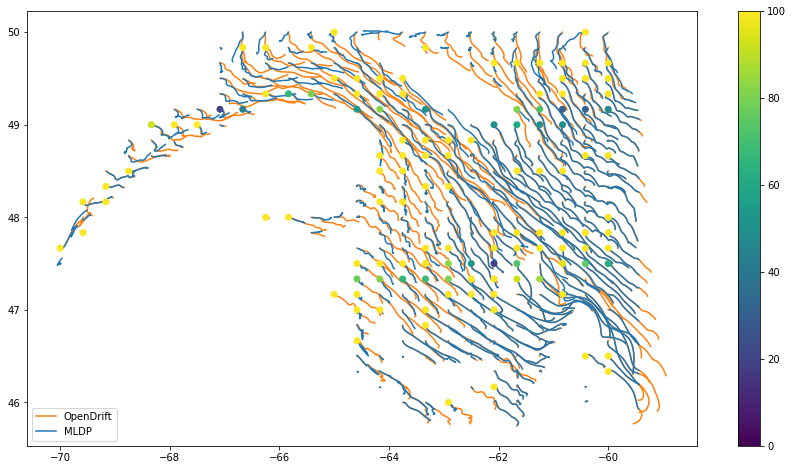

In [22]:
fig, ax = plt.subplots(1,1,figsize=(15,8))

for d, color, l in zip([do,dm], ['C1', 'C0'], [ 'OpenDrift', 'MLDP']):
    count=0
    for m in d.model_run.values:
        dsel = d.sel(model_run=m)
        label=l if count==0 else '__no-label__'
        ax.plot(dsel.mod_lon, dsel.mod_lat, '-', color=color,label=label)
        #ax.plot(dsel.mod_lon[0], dsel.mod_lat[0], '.g',label='__nolabel')
        count+=1
ax.legend()
mesh = ax.scatter(init_lons, init_lats,c=dist,zorder=10,vmin=0,vmax=100)
plt.colorbar(mesh,ax=ax)

In [23]:
do.time

<xarray.DataArray 'time' (time: 49)>
array(['2022-02-24T00:00:00.000000000', '2022-02-24T01:00:00.000000000',
       '2022-02-24T02:00:00.000000000', '2022-02-24T03:00:00.000000000',
       '2022-02-24T04:00:00.000000000', '2022-02-24T05:00:00.000000000',
       '2022-02-24T06:00:00.000000000', '2022-02-24T07:00:00.000000000',
       '2022-02-24T08:00:00.000000000', '2022-02-24T09:00:00.000000000',
       '2022-02-24T10:00:00.000000000', '2022-02-24T11:00:00.000000000',
       '2022-02-24T12:00:00.000000000', '2022-02-24T13:00:00.000000000',
       '2022-02-24T14:00:00.000000000', '2022-02-24T15:00:00.000000000',
       '2022-02-24T16:00:00.000000000', '2022-02-24T17:00:00.000000000',
       '2022-02-24T18:00:00.000000000', '2022-02-24T19:00:00.000000000',
       '2022-02-24T20:00:00.000000000', '2022-02-24T21:00:00.000000000',
       '2022-02-24T22:00:00.000000000', '2022-02-24T23:00:00.000000000',
       '2022-02-25T00:00:00.000000000', '2022-02-25T01:00:00.000000000',
       '2022-02-25T02:00:00.000000000', '2022-02-25T03:00:00.000000000',
       '2022-02-25T04:00:00.000000000', '2022-02-25T05:00:00.000000000',
       '2022-02-25T06:00:00.000000000', '2022-02-25T07:00:00.000000000',
       '2022-02-25T08:00:00.000000000', '2022-02-25T09:00:00.000000000',
       '2022-02-25T10:00:00.000000000', '2022-02-25T11:00:00.000000000',
       '2022-02-25T12:00:00.000000000', '2022-02-25T13:00:00.000000000',
       '2022-02-25T14:00:00.000000000', '2022-02-25T15:00:00.000000000',
       '2022-02-25T16:00:00.000000000', '2022-02-25T17:00:00.000000000',
       '2022-02-25T18:00:00.000000000', '2022-02-25T19:00:00.000000000',
       '2022-02-25T20:00:00.000000000', '2022-02-25T21:00:00.000000000',
       '2022-02-25T22:00:00.000000000', '2022-02-25T23:00:00.000000000',
       '2022-02-26T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-02-24 2022-02-24T01:00:00 ... 2022-02-26

In [24]:
dm.time

<xarray.DataArray 'time' (time: 47)>
array(['2022-02-24T01:00:00.000000000', '2022-02-24T02:00:00.000000000',
       '2022-02-24T03:00:00.000000000', '2022-02-24T04:00:00.000000000',
       '2022-02-24T05:00:00.000000000', '2022-02-24T06:00:00.000000000',
       '2022-02-24T07:00:00.000000000', '2022-02-24T08:00:00.000000000',
       '2022-02-24T09:00:00.000000000', '2022-02-24T10:00:00.000000000',
       '2022-02-24T11:00:00.000000000', '2022-02-24T12:00:00.000000000',
       '2022-02-24T13:00:00.000000000', '2022-02-24T14:00:00.000000000',
       '2022-02-24T15:00:00.000000000', '2022-02-24T16:00:00.000000000',
       '2022-02-24T17:00:00.000000000', '2022-02-24T18:00:00.000000000',
       '2022-02-24T19:00:00.000000000', '2022-02-24T20:00:00.000000000',
       '2022-02-24T21:00:00.000000000', '2022-02-24T22:00:00.000000000',
       '2022-02-24T23:00:00.000000000', '2022-02-25T00:00:00.000000000',
       '2022-02-25T01:00:00.000000000', '2022-02-25T02:00:00.000000000',
       '2022-02-25T03:00:00.000000000', '2022-02-25T04:00:00.000000000',
       '2022-02-25T05:00:00.000000000', '2022-02-25T06:00:00.000000000',
       '2022-02-25T07:00:00.000000000', '2022-02-25T08:00:00.000000000',
       '2022-02-25T09:00:00.000000000', '2022-02-25T10:00:00.000000000',
       '2022-02-25T11:00:00.000000000', '2022-02-25T12:00:00.000000000',
       '2022-02-25T13:00:00.000000000', '2022-02-25T14:00:00.000000000',
       '2022-02-25T15:00:00.000000000', '2022-02-25T16:00:00.000000000',
       '2022-02-25T17:00:00.000000000', '2022-02-25T18:00:00.000000000',
       '2022-02-25T19:00:00.000000000', '2022-02-25T20:00:00.000000000',
       '2022-02-25T21:00:00.000000000', '2022-02-25T22:00:00.000000000',
       '2022-02-25T23:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-02-24T01:00:00 ... 2022-02-25T23:00:00

In [25]:
do.mod_disp.max()

<xarray.DataArray 'mod_disp' ()>
array(144500.85582334)

In [26]:
dm.mod_disp.max()

<xarray.DataArray 'mod_disp' ()>
array(136221.11184223)

In [27]:
do.mod_dist

<xarray.DataArray 'mod_dist' (model_run: 306, time: 49)>
array([[   0.      , 1473.210486, 1207.242561, ...,  251.185867,    0.      ,
           0.      ],
       [   0.      , 1763.774289, 1801.434008, ...,    0.      ,  199.133122,
           0.      ],
       [   0.      ,  392.339724, 1271.554983, ...,  525.088295,  898.271333,
        1034.667726],
       ...,
       [   0.      , 2144.020222, 1910.279133, ...,  379.750842,  223.095101,
         249.007991],
       [   0.      , 2028.922477, 1852.144091, ...,  824.102215,  651.696368,
         704.283899],
       [   0.      , 1857.178233, 1938.94827 , ..., 1020.547605,  949.669504,
        1046.98175 ]])
Coordinates:
  * time     (time) datetime64[ns] 2022-02-24 2022-02-24T01:00:00 ... 2022-02-26
Dimensions without coordinates: model_run
Attributes:
    units:      meters
    long_name:  Distance between consecutive modelled trajectory points

# Windage 0

In [28]:
m = '/home/soontiensn/data/gpsc-work2/OPP/mldp-opendrift-comparison/DriftMap/new/mldp-winds0.0/output/ciops-e_ml_2022022400_P2D.nc'
o = '/home/soontiensn/data/gpsc-work2/OPP/mldp-opendrift-comparison/DriftMap/new/opendrift-winds0.0//output/ciops-e_od_2022022400_P2D.nc'

In [29]:
dm = xr.open_dataset(m)
do = xr.open_dataset(o)

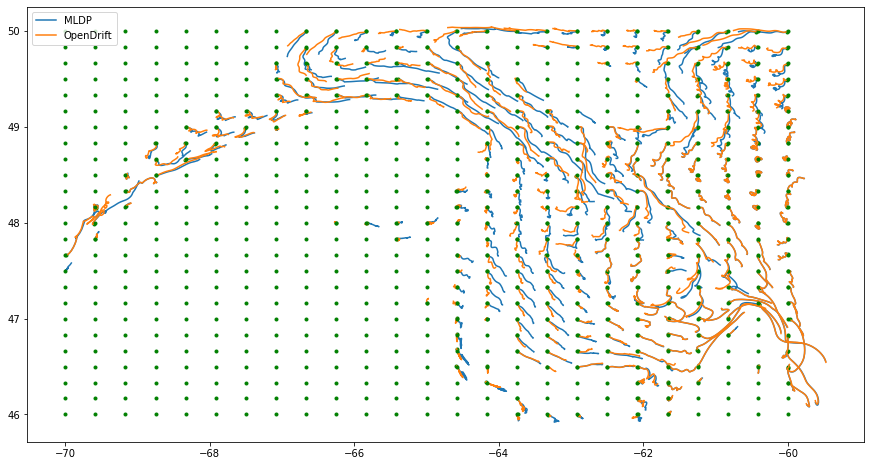

In [30]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
for d, color, l in zip([dm, do], ['C0', 'C1'], ['MLDP', 'OpenDrift']):
    count=0
    for m in d.model_run.values:
        dsel = d.sel(model_run=m)
        label=l if count==0 else '__no-label__'
        ax.plot(dsel.mod_lon, dsel.mod_lat, '-', color=color,label=label)
        ax.plot(dsel.mod_lon[0], dsel.mod_lat[0], '.g',label='__nolabel')
        count+=1
ax.legend()

Hmm - I was expecting these to be the same. Does the preprocessing stage in MLDP rotate the currents?

# MLDP wind0.0 vs winds 3.0

In [33]:
m0 = '/home/soontiensn/data/gpsc-work2/OPP/mldp-opendrift-comparison/DriftMap/new/mldp-winds0.0/output/ciops-e_ml_2022022400_P2D.nc'
m3 = '/home/soontiensn/data/gpsc-work2/OPP/mldp-opendrift-comparison/DriftMap/new/mldp-winds3.0/output/ciops-e_ml_2022022400_P2D.nc'

In [34]:
dm0 = xr.open_dataset(m0)
dm3 = xr.open_dataset(m3)

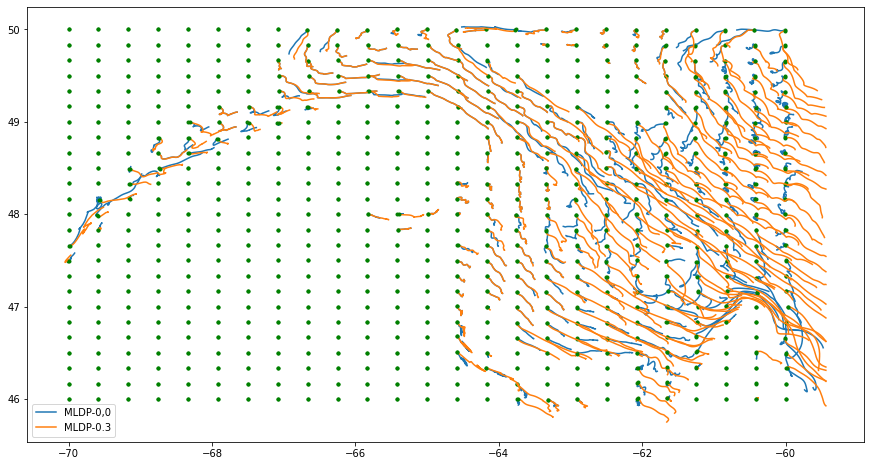

In [35]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
for d, color, l in zip([dm0, dm3], ['C0', 'C1'], ['MLDP-0,0', 'MLDP-0.3']):
    count=0
    for m in d.model_run.values:
        dsel = d.sel(model_run=m)
        label=l if count==0 else '__no-label__'
        ax.plot(dsel.mod_lon, dsel.mod_lat, '-', color=color,label=label)
        ax.plot(dsel.mod_lon[0], dsel.mod_lat[0], '.g',label='__nolabel')
        count+=1
ax.legend()